# Project Overview: Fraud Detection Using Machine Learning


#### In this project, we aim to develop a machine learning model that accurately detects fraudulent transactions. We'll be working with a dataset that contains various features related to customer transactions. The goal is to build predictive models that can identify fraudulent transactions based on historical data.

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import shap
# from fancyimpute import KNN

# Machine Learning libraries
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler


# Handling imbalanced data
from imblearn.over_sampling import SMOTE

# XGBoost and Deep Learning
from xgboost import XGBClassifier

## Exploratory Data Analysis

#### We begin by loading the dataset and conducting an initial exploration to understand its structure, completeness, and the types of features it contains. Specifically, we:

 - Load the dataset and display the first few rows (df.head()).
 - Check the data types, missing values, and summary statistics using functions like info() and describe().
 - Assess the presence of duplicates and missing value

These steps are essential to ensure data quality and determine if any preprocessing is required before building models.

In [2]:
df = pd.read_csv('dataset.csv')
df.head()

,AcountNumber,CVV,CardInformation,CustomerAge,Gender,Marital Status,Cards,CardColour,CardType,TransactionType,Domain,ATM,POSWEBLimit,CreditLimit,Amount,AverageIncomeExpendicture,NewBalance,OldBalance,Outcome
0,1275734409,364,755189,28.0,Male,Married,Debit,Gold,Verve,Credit,Local,150000,2000000,500000,129282,170919,460070,330788,0
1,1271246193,401,513706,25.0,Male,Single,Debit,Gold,Verve,Debit,International,150000,2000000,200000,574384,329353,136286,327052,1
2,1242290165,266,648473,21.0,Female,Married,Credit,White,Visa,Credit,International,120000,4000000,500000,190766,292922,448997,258231,0
3,1245478185,402,416049,26.0,Male,Unknown,Credit,White,Visa,Credit,Local,120000,4000000,500000,130395,145444,330071,199676,0
4,1258212072,334,459937,28.0,Female,Married,Debit,Gold,Verve,Credit,International,150000,2000000,500000,685145,295990,991630,306485,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37097 entries, 0 to 37096
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   AcountNumber               37097 non-null  int64  
 1   CVV                        37097 non-null  int64  
 2   CardInformation            37097 non-null  int64  
 3   CustomerAge                28246 non-null  float64
 4   Gender                     37097 non-null  object 
 5   Marital Status             37097 non-null  object 
 6   Cards                      37097 non-null  object 
 7   CardColour                 37097 non-null  object 
 8   CardType                   37097 non-null  object 
 9   TransactionType            37097 non-null  object 
 10  Domain                     37097 non-null  object 
 11  ATM                        37097 non-null  int64  
 12  POSWEBLimit                37097 non-null  int64  
 13  CreditLimit                37097 non-null  int

In [4]:
# checking for duplicates
df.duplicated().sum()

0

In [5]:
df.describe()

,AcountNumber,CVV,CardInformation,CustomerAge,ATM,POSWEBLimit,CreditLimit,Amount,AverageIncomeExpendicture,NewBalance,OldBalance,Outcome
count,3.709700e+04,37097.000000,37097.000000,28246.000000,37097.000000,3.709700e+04,37097.000000,37097.000000,37097.000000,3.709700e+04,37097.000000,37097.000000
mean,1.264835e+09,443.595897,559543.728873,39.157509,140870.690352,2.452101e+06,335101.221123,550260.997736,227386.956492,2.948066e+05,350202.783028,0.737796
std,1.478694e+07,135.223267,133128.958922,20.063996,13803.627460,1.066814e+06,169488.715096,260629.814049,78977.053916,6.239614e+05,144781.945405,0.439839
min,1.239297e+09,211.000000,329328.000000,18.000000,120000.000000,1.200000e+06,150000.000000,100003.000000,100017.000000,-8.973780e+05,100001.000000,0.000000
25%,1.251999e+09,327.000000,443420.000000,23.000000,120000.000000,2.000000e+06,200000.000000,324480.000000,161178.000000,-2.398140e+05,224577.000000,0.000000
50%,1.264885e+09,443.000000,560072.000000,29.000000,150000.000000,2.000000e+06,200000.000000,550293.000000,222530.000000,2.154320e+05,348916.000000,1.000000
75%,1.277613e+09,561.000000,675257.000000,55.000000,150000.000000,4.000000e+06,500000.000000,775075.000000,283447.000000,8.509920e+05,477291.000000,1.000000
max,1.290470e+09,678.000000,789366.000000,85.000000,150000.000000,4.000000e+06,600000.000000,999956.000000,399971.000000,1.591355e+06,599990.000000,1.000000


In [6]:
df.isnull().sum()

AcountNumber                    0
CVV                             0
CardInformation                 0
CustomerAge                  8851
Gender                          0
Marital Status                  0
Cards                           0
CardColour                      0
CardType                        0
TransactionType                 0
Domain                          0
ATM                             0
POSWEBLimit                     0
CreditLimit                     0
Amount                          0
AverageIncomeExpendicture       0
NewBalance                      0
OldBalance                      0
Outcome                         0
dtype: int64

## Data Visualization

#### Next, we visualize the distribution of the numerical columns to gain insight into the spread of the data:

- We plot the distribution and boxplots of key numerical features like CustomerAge to identify any potential outliers.
- Missing values in CustomerAge are imputed with the median, and the updated distribution is visualized again.

Visualization helps us understand the underlying patterns and detect anomalies in the dataset, which will inform feature engineering.

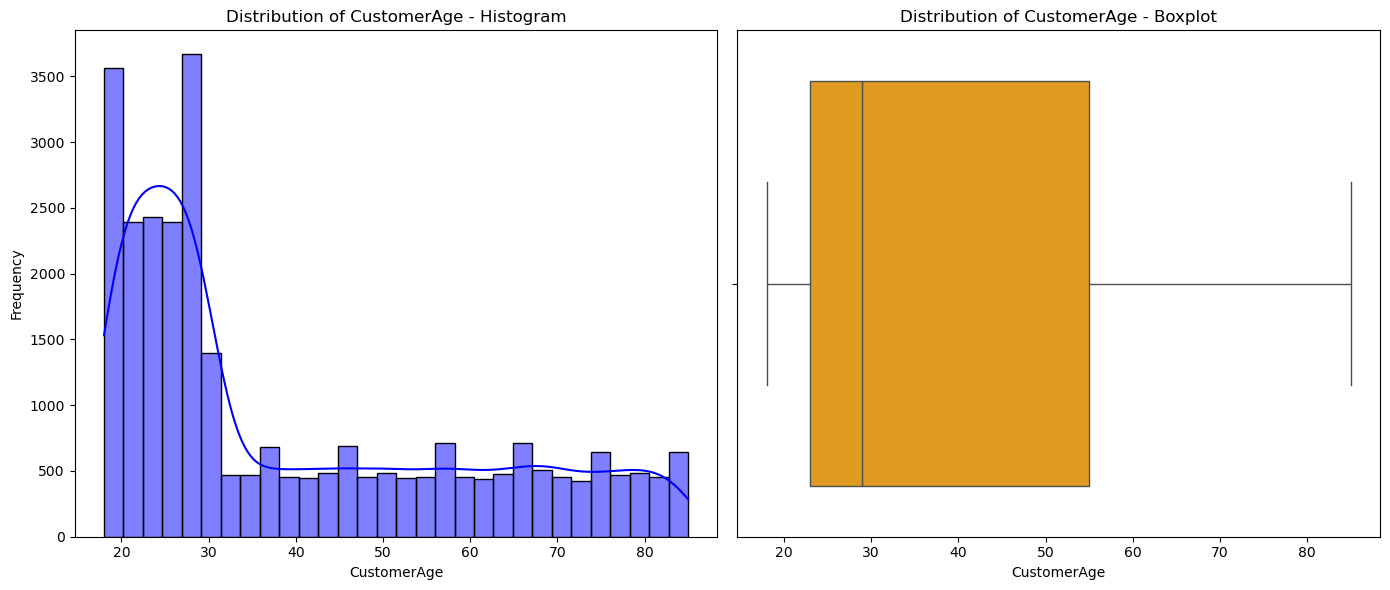

In [7]:
# Function to plot distribution for numerical columns
def plot_distribution(df, column):
    plt.figure(figsize=(14, 6))

    # Plot Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[column], bins=30, kde=True, color='blue')
    plt.title(f'Distribution of {column} - Histogram')
    plt.xlabel(column)
    plt.ylabel('Frequency')

    # Plot Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[column], color='orange')
    plt.title(f'Distribution of {column} - Boxplot')
    plt.xlabel(column)

    plt.tight_layout()
    plt.show()

# Plot distribution of 'CustomerAge' column
plot_distribution(df, 'CustomerAge')

In [8]:
# impute median age for missing age values
median_age = df['CustomerAge'].median()
df['CustomerAge'] = df['CustomerAge'].fillna(median_age)

Text(0, 0.5, 'Frequency')

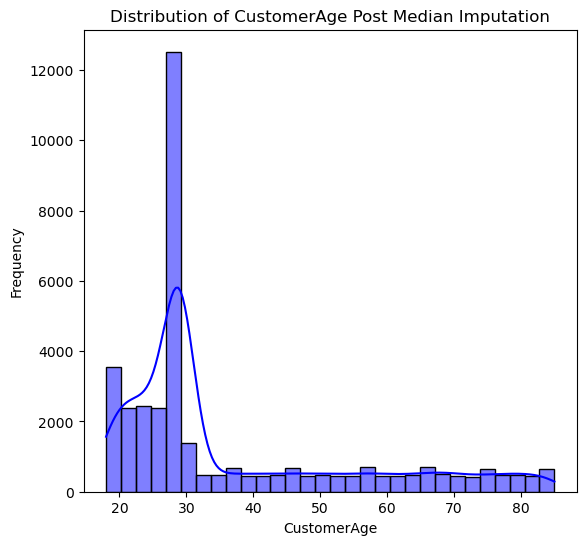

In [9]:
 # Histogram of CustomerAge after median Imputation
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['CustomerAge'], bins=30, kde=True, color='blue')
plt.title(f'Distribution of CustomerAge Post Median Imputation')
plt.xlabel('CustomerAge')
plt.ylabel('Frequency')

From the new histogram, it appears that after imputing the missing values with the median, there is a significant spike at the median age (around 30). This indicates that all missing values were replaced with this single value, which creates a noticeable distortion in the distribution and introduces a large, unnatural peak at that age.

*What to make of this:*
- The large spike at the median age means that while we've filled the missing values, it has likely introduced bias into the dataset. Now, a disproportionately high number of customers have the median age, which might not accurately reflect the true distribution of the missing ages.
- Imputing with the median, while simple, can mask the actual distribution of the missing values and lead to misleading insights, especially if the missing data is not missing completely at random.

*Better ways to handle missing values:*
1. *K-Nearest Neighbors (KNN) Imputation:* This method fills missing values based on the age of the nearest neighbors in the dataset, taking into account other similar features (e.g., gender, income) to estimate a more accurate value for CustomerAge.

####**However due to memory issues, we proceeded with the median imputation**

In [10]:
# # Select columns to be used in KNN imputation (CustomerAge and other relevant features)
# features = ['CustomerAge', 'Gender_Male', 'Gender_Female','Marital Status_Divorced', 'AverageIncomeExpendicture', 'Marital Status_Married','Marital Status_Single','Marital Status_Unknown']
# df_subset = df_encoded[features]

# # Perform KNN Imputation
# # Note: KNN(k=5) by default looks at 5 nearest neighbors
# df_imputed = pd.DataFrame(KNN(k=5).fit_transform(df_subset), columns=features)

In [11]:
# # Replace the original CustomerAge column with the imputed one
# df['CustomerAge'] = df_imputed['CustomerAge']

# # Plot the new distribution
# sns.histplot(df['CustomerAge'], kde=True, color="blue", bins=30)
# plt.title('Distribution of CustomerAge After KNN Imputation')
# plt.xlabel('CustomerAge')
# plt.ylabel('Frequency')
# plt.show()


In [12]:

# # Replace the original CustomerAge column with the imputed one
# df['CustomerAge'] = df_imputed['CustomerAge']

# # Plot the new distribution
# sns.histplot(df['CustomerAge'], kde=True, color="blue", bins=30)
# plt.title('Distribution of CustomerAge After KNN Imputation')
# plt.xlabel('CustomerAge')
# plt.ylabel('Frequency')
# plt.show()


## Class Imbalance and Correction

####The target variable Outcome, which represents whether a transaction is fraudulent or not, is explored:

- We visualize the class distribution to assess whether the dataset is imbalanced.
- The outcome labels appear to be incorrectly coded, so we relabel them to match the correct interpretation (0 for non-fraudulent and 1 for fraudulent).

####Class imbalance is a common challenge in fraud detection, and addressing it appropriately ensures better model performance.

In [13]:
# checking the distribution of the fraudulent transactions
class_counts = df['Outcome'].value_counts()
class_counts

Outcome
1    27370
0     9727
Name: count, dtype: int64

C:\Users\user\AppData\Local\Temp\ipykernel_8072\1287646499.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='Blues')


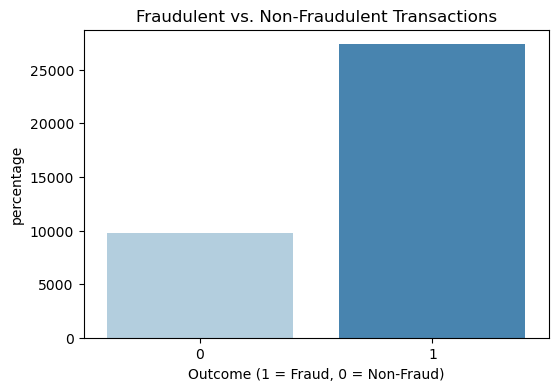

In [14]:
# Visualize class distribution
plt.figure(figsize=(6,4))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='Blues')
plt.title('Fraudulent vs. Non-Fraudulent Transactions')
plt.xlabel('Outcome (1 = Fraud, 0 = Non-Fraud)')
plt.ylabel('percentage')
plt.show()

In [15]:
# relabeling the classes appropriately because the classes seem to be labeled wrongly
df['Outcome'] = df['Outcome'].apply(lambda x: 0 if x == 1 else 1)
df.head()

,AcountNumber,CVV,CardInformation,CustomerAge,Gender,Marital Status,Cards,CardColour,CardType,TransactionType,Domain,ATM,POSWEBLimit,CreditLimit,Amount,AverageIncomeExpendicture,NewBalance,OldBalance,Outcome
0,1275734409,364,755189,28.0,Male,Married,Debit,Gold,Verve,Credit,Local,150000,2000000,500000,129282,170919,460070,330788,1
1,1271246193,401,513706,25.0,Male,Single,Debit,Gold,Verve,Debit,International,150000,2000000,200000,574384,329353,136286,327052,0
2,1242290165,266,648473,21.0,Female,Married,Credit,White,Visa,Credit,International,120000,4000000,500000,190766,292922,448997,258231,1
3,1245478185,402,416049,26.0,Male,Unknown,Credit,White,Visa,Credit,Local,120000,4000000,500000,130395,145444,330071,199676,1
4,1258212072,334,459937,28.0,Female,Married,Debit,Gold,Verve,Credit,International,150000,2000000,500000,685145,295990,991630,306485,0


In [16]:
class_percentage = round(df['Outcome'].value_counts() / len(df) * 100, 0)
class_percentage

Outcome
0    74.0
1    26.0
Name: count, dtype: float64

C:\Users\user\AppData\Local\Temp\ipykernel_8072\881568272.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_percentage.index, y=class_percentage.values, palette='Blues')


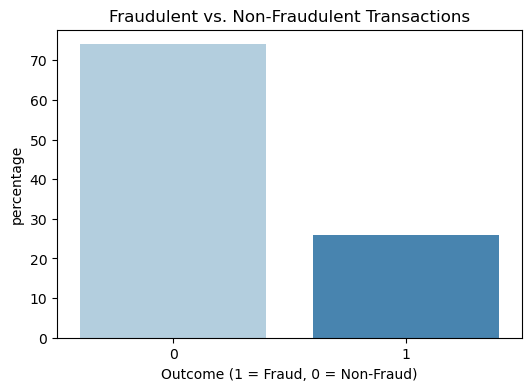

In [17]:
# Visualize class distribution after relabeling
plt.figure(figsize=(6,4))
sns.barplot(x=class_percentage.index, y=class_percentage.values, palette='Blues')
plt.title('Fraudulent vs. Non-Fraudulent Transactions')
plt.xlabel('Outcome (1 = Fraud, 0 = Non-Fraud)')
plt.ylabel('percentage')
plt.show()

## Encoding Categorical Variables and Correlation Analysis

####After dealing with missing data and label correction, we:

- Encode the categorical columns using one-hot encoding to convert them into a numerical format suitable for machine learning algorithms.
- Generate a heatmap to examine correlations between the features.

####This helps us better understand feature relationships and determine which variables might be important for prediction.

In [18]:
categorical_col = df.select_dtypes(include=['object']).columns.tolist()

df_encoded = pd.get_dummies(df, columns=categorical_col)
df_encoded.head()

,AcountNumber,CVV,CardInformation,CustomerAge,ATM,POSWEBLimit,CreditLimit,Amount,AverageIncomeExpendicture,NewBalance,...,Cards_Prepaid,CardColour_Gold,CardColour_White,CardType_MasterCard,CardType_Verve,CardType_Visa,TransactionType_Credit,TransactionType_Debit,Domain_International,Domain_Local
0,1275734409,364,755189,28.0,150000,2000000,500000,129282,170919,460070,...,False,True,False,False,True,False,True,False,False,True
1,1271246193,401,513706,25.0,150000,2000000,200000,574384,329353,136286,...,False,True,False,False,True,False,False,True,True,False
2,1242290165,266,648473,21.0,120000,4000000,500000,190766,292922,448997,...,False,False,True,False,False,True,True,False,True,False
3,1245478185,402,416049,26.0,120000,4000000,500000,130395,145444,330071,...,False,False,True,False,False,True,True,False,False,True
4,1258212072,334,459937,28.0,150000,2000000,500000,685145,295990,991630,...,False,True,False,False,True,False,True,False,True,False


In [19]:
categorical_col

['Gender',
 'Marital Status',
 'Cards',
 'CardColour',
 'CardType',
 'TransactionType',
 'Domain']

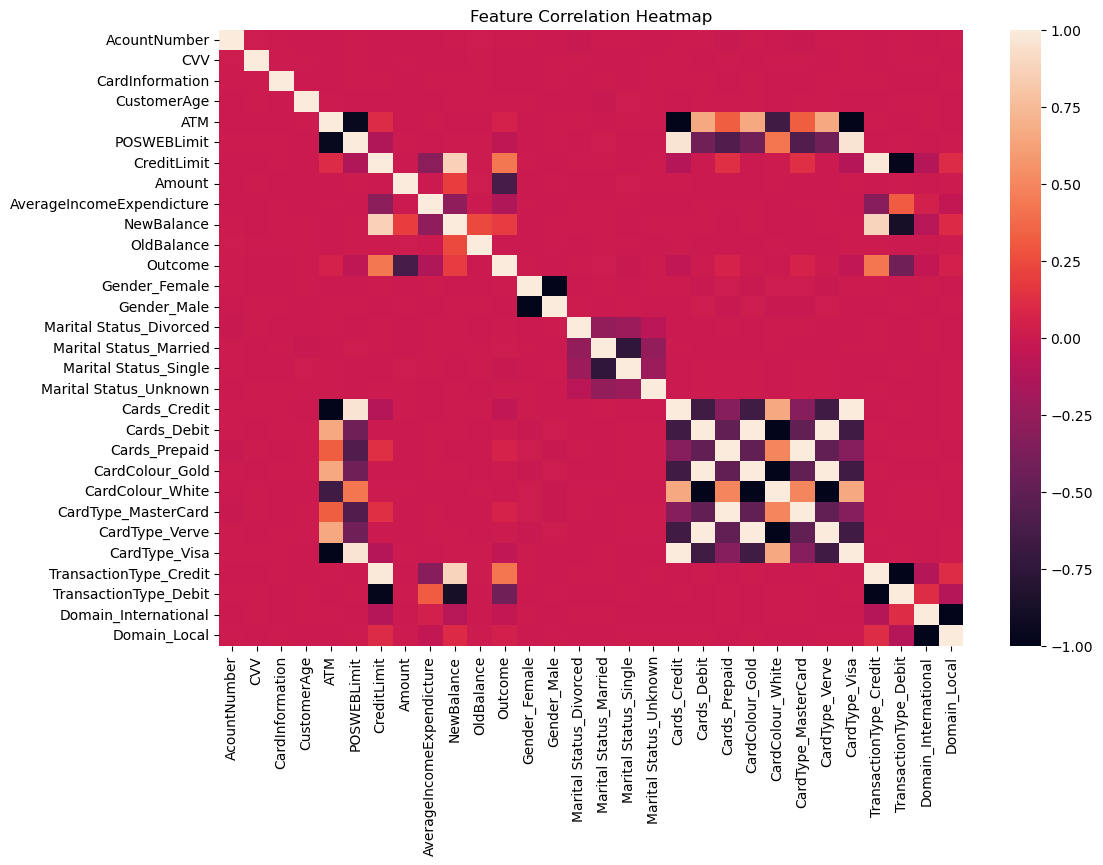

In [20]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr())
plt.title('Feature Correlation Heatmap')
plt.show()

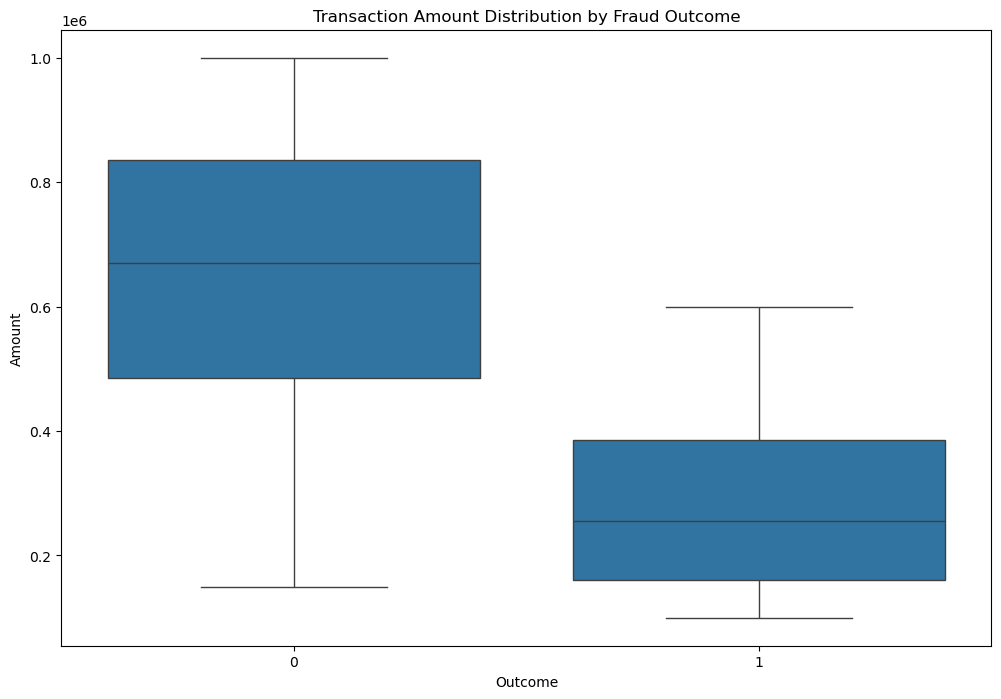

In [21]:
# Boxplot of numerical features grouped by fraud outcome
plt.figure(figsize=(12, 8))
sns.boxplot(x='Outcome', y='Amount', data=df)
plt.title('Transaction Amount Distribution by Fraud Outcome')
plt.show()

In [22]:
df_encoded.columns

Index(['AcountNumber', 'CVV', 'CardInformation', 'CustomerAge', 'ATM',
       'POSWEBLimit', 'CreditLimit', 'Amount', 'AverageIncomeExpendicture',
       'NewBalance', 'OldBalance', 'Outcome', 'Gender_Female', 'Gender_Male',
       'Marital Status_Divorced', 'Marital Status_Married',
       'Marital Status_Single', 'Marital Status_Unknown', 'Cards_Credit',
       'Cards_Debit', 'Cards_Prepaid', 'CardColour_Gold', 'CardColour_White',
       'CardType_MasterCard', 'CardType_Verve', 'CardType_Visa',
       'TransactionType_Credit', 'TransactionType_Debit',
       'Domain_International', 'Domain_Local'],
      dtype='object')

## Model Preparation and Balancing the Dataset

In [23]:
# splitting the data into train and test sets
X = df_encoded.drop(columns=['Outcome'])
y = df_encoded['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


####Since the dataset is imbalanced, we apply SMOTE (Synthetic Minority Over-sampling Technique) to oversample the minority class (fraudulent transactions) and balance the dataset.

####After balancing, we scale the numerical features to standardize them for model training.


In [24]:
# Apply SMOTE to balance classes after splitting
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Scaling the features
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)


In [25]:
X_train_resampled.shape

(43942, 29)

In [26]:
X_train.shape

(29677, 29)

## Model Training and Evaluation
#### We experiment with several machine learning models, including:

- Random Forest and Logistic Regression models on both the original imbalanced data and the balanced data after applying SMOTE.
- We evaluate the models using metrics such as precision, recall, F1-score, and accuracy to understand their performance.

#### The goal here is to assess how well the models handle the classification task, especially given the initial class imbalance.


### Without Sampling

In [27]:
# Random Forest Classifier without sampling
rf1 = RandomForestClassifier()
rf1.fit(X_train, y_train)

# Predictions
y_pred_rf1 = rf1.predict(X_test)

# Evaluation
print("Random Forest Metrics:")
print(classification_report(y_test, y_pred_rf1))

Random Forest Metrics:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      5399
           1       0.27      1.00      0.43      2021

    accuracy                           0.27      7420
   macro avg       0.14      0.50      0.21      7420
weighted avg       0.07      0.27      0.12      7420



C:\Users\user\anaconda3\envs\python\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\user\anaconda3\envs\python\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\anaconda3\envs\python\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\anaconda3\envs\python\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-def

In [28]:
# Logistic Regression Model without sampling
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predictions
y_pred_log_reg = log_reg.predict(X_test)

# Evaluation
print("Logistic Regression Metrics:")
print(classification_report(y_test, y_pred_log_reg))

Logistic Regression Metrics:
              precision    recall  f1-score   support

           0       1.00      0.85      0.92      5399
           1       0.71      1.00      0.83      2021

    accuracy                           0.89      7420
   macro avg       0.86      0.93      0.88      7420
weighted avg       0.92      0.89      0.90      7420



C:\Users\user\anaconda3\envs\python\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\envs\python\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


### With SMOTE sampling

In [29]:
# Random Forest Classifier with sampling
rf = RandomForestClassifier()
rf.fit(X_train_resampled, y_train_resampled)

# Predictions
y_pred_rf = rf.predict(X_test)

# Evaluation
print("Random Forest Metrics:")
print(classification_report(y_test, y_pred_rf))


Random Forest Metrics:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5399
           1       1.00      1.00      1.00      2021

    accuracy                           1.00      7420
   macro avg       1.00      1.00      1.00      7420
weighted avg       1.00      1.00      1.00      7420



In [30]:
# Logistic Regression Model with sampling
log_reg = LogisticRegression()
log_reg.fit(X_train_resampled, y_train_resampled)

# Predictions
y_pred_log_reg = log_reg.predict(X_test)

# Evaluation
print("Logistic Regression Metrics:")
print(classification_report(y_test, y_pred_log_reg))


Logistic Regression Metrics:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5399
           1       0.99      1.00      1.00      2021

    accuracy                           1.00      7420
   macro avg       1.00      1.00      1.00      7420
weighted avg       1.00      1.00      1.00      7420




## Feature Importance
####To interpret the models, we:

- Extract and visualize the top 10 most important features from both the Random Forest and Logistic Regression models.

####Understanding feature importance allows us to identify the most influential factors driving the predictions, which can provide valuable insights for stakeholders.

                    Feature  Coefficient  Importance
7                    Amount   -21.571740   21.571740
6               CreditLimit    12.273251   12.273251
14   Marital Status_Married     3.119254    3.119254
11            Gender_Female     3.104167    3.104167
15    Marital Status_Single     3.011645    3.011645
12              Gender_Male     2.853482    2.853482
28             Domain_Local     2.657507    2.657507
27     Domain_International     2.394597    2.394597
16   Marital Status_Unknown     1.798640    1.798640
13  Marital Status_Divorced     1.779210    1.779210


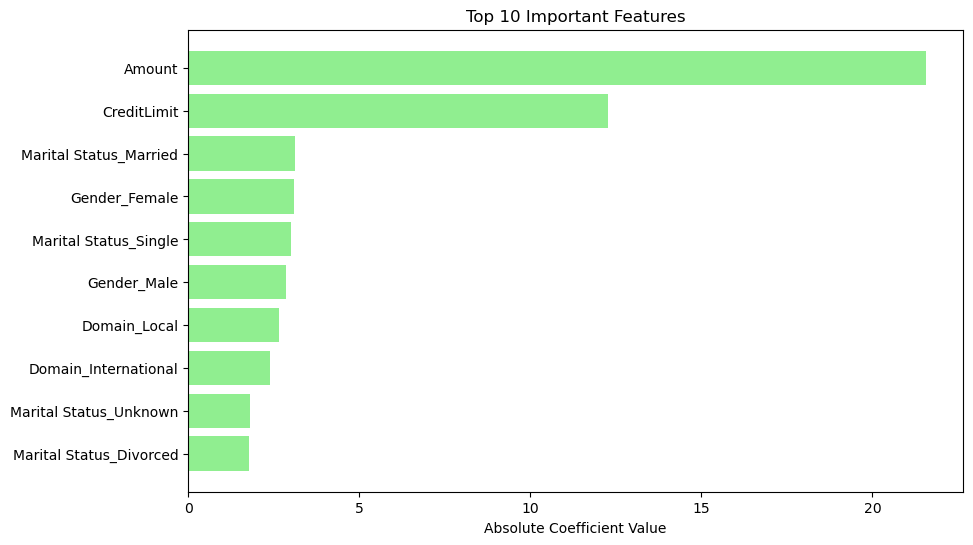

In [31]:
# Extract top 10 important features
coefficients = log_reg.coef_[0]
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients
})
feature_importance['Importance'] = np.abs(feature_importance['Coefficient'])
top_10_features = feature_importance.sort_values(by='Importance', ascending=False).head(10)

print(top_10_features)

# Plot the top 10 features
plt.figure(figsize=(10, 6))
plt.barh(top_10_features['Feature'], top_10_features['Importance'], color='lightgreen')
plt.xlabel('Absolute Coefficient Value')
plt.title('Top 10 Important Features')
plt.gca().invert_yaxis()  # Invert the y-axis to show the most important features at the top
plt.show()

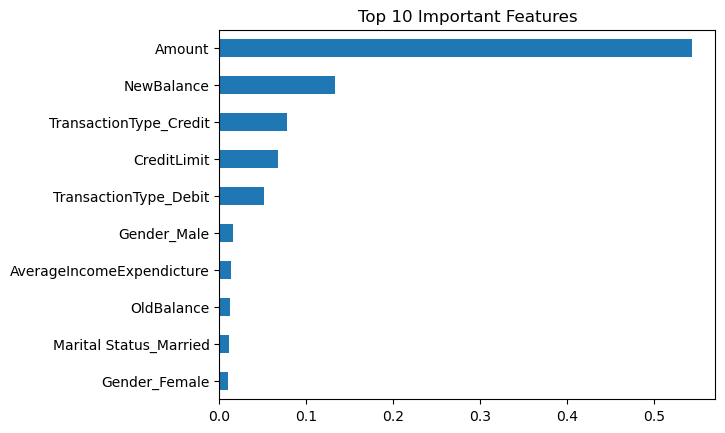

In [32]:
# Check feature importance of the rf model
importances = rf.feature_importances_
feature_names = X.columns

# Plot Feature Importance
feat_importances = pd.Series(importances, index=feature_names)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Important Features")
plt.gca().invert_yaxis()  # Invert the y-axis to show the most important features at the top
plt.show()

## Ensemble Learning: Voting Classifier
#### We also build an ensemble model using a Voting Classifier, which combines the predictions of several strong classifiers (Random Forest, XGBoost, and Gradient Boosting). This helps to improve performance by leveraging the strengths of different models.

####The performance of the ensemble model is compared to individual models to identify the best classifier.

In [33]:
# Create individual classifiers
rf_clf = RandomForestClassifier(class_weight='balanced_subsample', random_state=42)
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
gb_clf = GradientBoostingClassifier(random_state=5)

# Create the Voting Classifier
voting_clf = VotingClassifier(estimators=[('rf', rf_clf), ('xgb', xgb_clf), ('gb', gb_clf)], voting='hard')

# Train the Voting Classifier
voting_clf.fit(X_train_resampled, y_train_resampled)

# Evaluate the Voting Classifier
voting_clf_score = voting_clf.score(X_test, y_test)
print("Voting Classifier Accuracy:", voting_clf_score)

C:\Users\user\anaconda3\envs\python\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:27:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Voting Classifier Accuracy: 0.9998652291105121


In [34]:
# Find the best performing individual classifier
best_clf = None
best_score = 0
for clf in voting_clf.estimators_:
    clf_score = clf.score(X_test, y_test)
    if clf_score > best_score:
        best_clf = clf
        best_score = clf_score

print("Best Individual Classifier:", best_clf.__class__.__name__)
print("Best Individual Classifier Accuracy:", best_score)

Best Individual Classifier: GradientBoostingClassifier
Best Individual Classifier Accuracy: 1.0


## Hyperparameter Tuning
####To further optimize the best-performing classifier, we apply Grid Search to tune hyperparameters. This step fine-tunes the model to achieve the best possible performance on the test data.

In [35]:
# Perform hyperparameter tuning on the best individual classifier
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5]
}

grid_search = GridSearchCV(best_clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_resampled, y_train_resampled)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)
print("Final Model Accuracy:", best_model.score(X_test, y_test))

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Final Model Accuracy: 1.0


## Conclusion and Next Steps
#### So far, we have explored, preprocessed, and built multiple models for fraud detection. We've successfully improved performance using SMOTE to address class imbalance, and we have identified the most important features influencing fraud detection. The next steps involve:

- Further fine-tuning the models through hyperparameter optimization.
- Potentially experimenting with more advanced techniques like neural networks or anomaly detection models.
- Evaluating models on additional datasets to ensure generalizability.

####The project will conclude with a comparison of the final model’s performance against industry benchmarks, and recommendations will be made for deployment in a real-world fraud detection system.

 ## Save pre-trained model in a format compatible with pickle.

In [36]:
import pickle

# Save the model just like we would a Python file
model_save_path = "mlr_model.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(log_reg ,file)



In [37]:
import pickle

# Save the model just like we would a Python file
model_save_path = "mrf_model.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(rf_clf ,file)

In [38]:
# Save the model just like we would a Python file
model_save_path = "lxgb_model.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(gb_clf ,file)